In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

f = h5py.File("data/Statis_wave_crres_chorus_model_intensity_fband_0P1-0P5fce.h5", "r")

print(" AE_bins:", f["AE_bins"].shape)
print(" Distribution_bins:", f["Distribution_bins"].shape)
print(" Lstar:", f["Lstar"].shape)
print(" Number_of_samples:", f["Number_of_samples"].shape)
print(" Percentile_bins:", f["Percentile_bins"].shape)
print(" Percentile_data:", f["Percentile_data"].shape)
print(" MLAT:", f["mlat"].shape)
print(" MLT:", f["Mltime"].shape)
print(" Distribution_data:", f["Distribution_data"].shape)

AE_bins = f["AE_bins"][:]
Distribution_bins = f["Distribution_bins"][:]
Lstar = f["Lstar"][:]
Number_of_samples = f["Number_of_samples"][:]
Percentile_bins = f["Percentile_bins"][:]
Percentile_data = f["Percentile_data"][:]
mlat = f["mlat"][:]
mlt = f["Mltime"][:]
Distribution_data = f["Distribution_data"][:]

f.close()

 AE_bins: (3, 2)
 Distribution_bins: (99,)
 Lstar: (45,)
 Number_of_samples: (24, 13, 45, 3)
 Percentile_bins: (11,)
 Percentile_data: (11, 24, 13, 45, 3)
 MLAT: (13,)
 MLT: (24,)
 Distribution_data: (99, 24, 13, 45, 3)


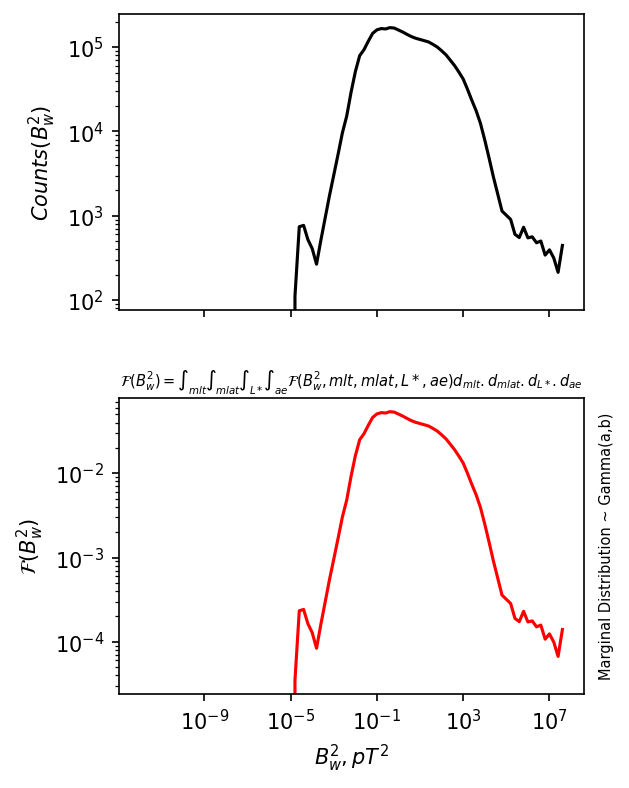

In [2]:
# Plot marginal distribution of CRRES data -> [Bw^2, MLT, MLAT, L*, AE]
# the data is marginalized over all the axis
marginal_CRRES = Distribution_data.sum(axis=(1,2,3,4))
fig, axes = plt.subplots(dpi=150, nrows=2, ncols=1, sharex=True, figsize=(4,6))
ax = axes[0]
ax.loglog(Distribution_bins, marginal_CRRES, color="k")
ax.set_ylabel(r"$Counts (B_w^2)$")
ax = axes[1]
ax.loglog(Distribution_bins, marginal_CRRES/marginal_CRRES.sum(), color="r")
ax.set_ylabel(r"$\mathcal{F}(B_w^2)$")
ax.set_xlabel(r"$B_w^2, pT^2$")
ax.set_title(r"$\mathcal{F}(B_w^2)=\int_{mlt}\int_{mlat}\int_{L*}\int_{ae}\mathcal{F}(B_w^2,mlt,mlat,L*,ae) d_{mlt}.d_{mlat}.d_{L*}.d_{ae}$",
             fontdict={"size":7})
ax.text(1.05, 0.5, "Marginal Distribution ~ Gamma(a,b)", ha="center", va="center", transform=ax.transAxes, rotation=90,
       fontdict={"size":7})
fig.subplots_adjust(hspace=0.3)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Log scale: values of z <= 0 have been masked
  if __name__ == '__main__':
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'shading'
  if __name__ == '__main__':
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


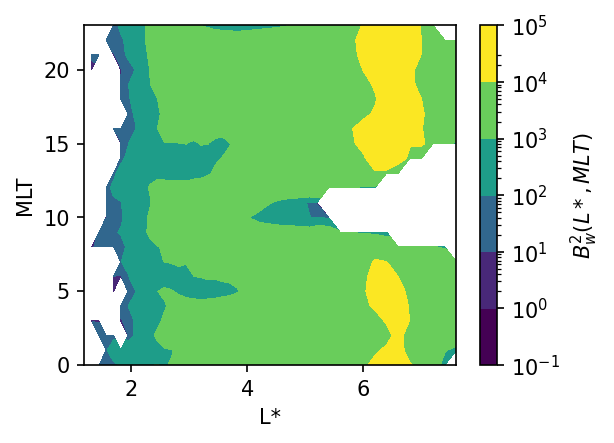

In [3]:
# Plot marginal distribution of CRRES data -> [Bw^2, MLT, MLAT, L*, AE]
# the data is marginalized over AE and MLAT axis
marginal_ae_mlat_CRRES = Distribution_data.sum(axis=(0,2,4))
fig, ax = plt.subplots(dpi=150, figsize=(4,3))
ax.set_xlabel("L*")
ax.set_ylabel("MLT")
X, Y = np.meshgrid(Lstar, mlt)#marginal_ae_mlat_CRRES
pcm = ax.contourf(X, Y, marginal_ae_mlat_CRRES, shading="auto", 
              norm=colors.LogNorm(vmin=marginal_ae_mlat_CRRES.min() + 1, vmax=marginal_ae_mlat_CRRES.max()))
cb = fig.colorbar(pcm, ax=ax, extend="max")
cb.set_label(r"$B_w^2(L*,MLT)$")

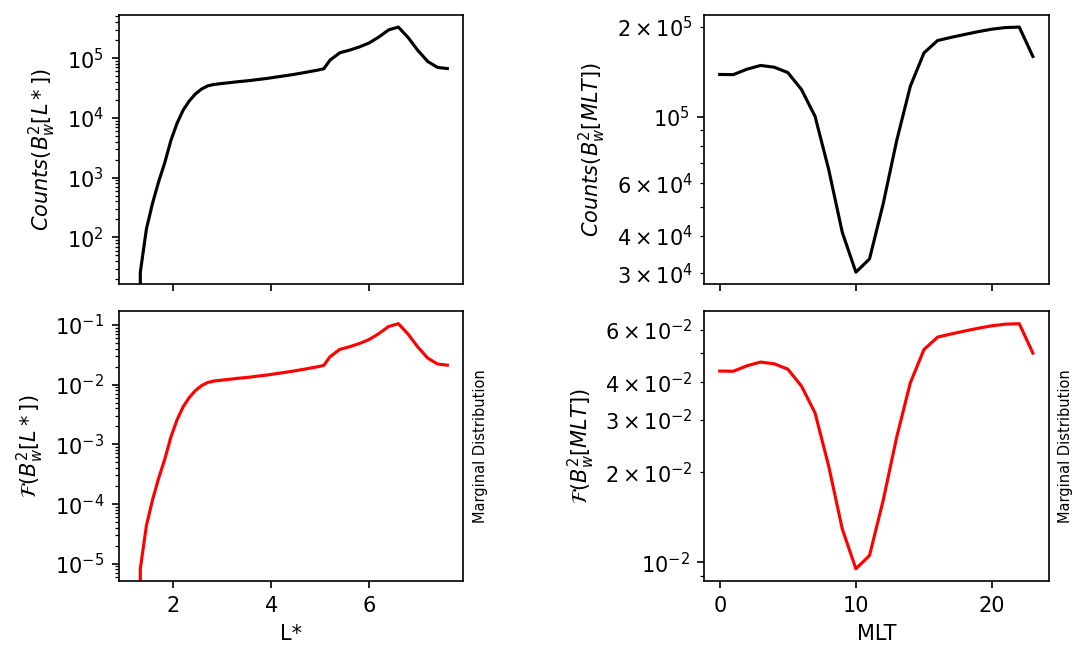

In [18]:
# Plot marginal distribution of CRRES data -> [Bw^2, MLT, MLAT, L*, AE]
# the data is marginalized over AE, MLAT and MLT or L* axis
fig, axes = plt.subplots(dpi=150, figsize=(8,5), nrows=2, ncols=2, sharex="col")
ax = axes[0,0]
ax.set_ylabel(r"$Counts (B_w^2[L*])$")
ax.semilogy(Lstar, Distribution_data.sum(axis=(0,1,2,4)),color="k")
ax = axes[1,0]
ax.semilogy(Lstar, Distribution_data.sum(axis=(0,1,2,4))/Distribution_data.sum(axis=(0,1,2,4)).sum(), color="r")
ax.set_ylabel(r"$\mathcal{F}(B_w^2[L*])$")
ax.set_xlabel("L*")
ax.text(1.05, 0.5, "Marginal Distribution", ha="center", va="center", transform=ax.transAxes, rotation=90,
       fontdict={"size":7})

ax = axes[0,1]
ax.set_ylabel(r"$Counts (B_w^2[MLT])$")
ax.semilogy(mlt, Distribution_data.sum(axis=(0,2,3,4)),color="k")
ax = axes[1,1]
ax.semilogy(mlt, Distribution_data.sum(axis=(0,2,3,4))/Distribution_data.sum(axis=(0,2,3,4)).sum(), color="r")
ax.set_ylabel(r"$\mathcal{F}(B_w^2[MLT])$")
ax.set_xlabel("MLT")
ax.text(1.05, 0.5, "Marginal Distribution", ha="center", va="center", transform=ax.transAxes, rotation=90,
       fontdict={"size":7})
fig.subplots_adjust(hspace=0.1, wspace=0.7)

In [ ]:
# Aistribution of CRRES data -> [Bw^2, MLT, MLAT, L*, AE]
# Compute Bw^2 based on MLT and L 
# Assuming L ~ Lstar
###########################################################################################
# the data is marginalized over AE and MLAT axis F(Bw^2|a,b) ~ f(a,b); a ~ f(L*,MLT)
CRRES_marginal_ae_mlat = Distribution_data.sum(axis=(0,2,4))